In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import numpy as np


def co_occurance_mat(tags):
    
    vect = CountVectorizer(min_df=1000)
    
    X = vect.fit_transform(tags)
    
    C = (X.T * X).toarray()
    
    row_sums = C.sum(axis=1).astype(np.float32)
    C_dense = C / row_sums[:, np.newaxis]
    
    return C_dense , vect

def hashtag_index(text,vect):
    
    X = []
    vocab = vect.vocabulary_
    
    for i in range(len(text)):
        index = []
        doc = text[i]
        for word in doc.split(','):
            if word in vocab:
                index.append(vocab[word])
        X.append(index)
    
    
    return X





In [6]:
X = pd.read_csv('media_fixed.csv',sep=';',encoding = "ISO-8859-1")
X= X.fillna('')

tags = X['tagset']

C , vect = co_occurance_mat(tags)

pca = PCA(n_components=110)

H = pca.fit_transform(C )

print pca.explained_variance_ratio_.sum()

bow = vect.transform(tags).toarray()
mask = bow.sum(axis=1)  > 0
X_popular = X[mask]

tag_idx = hashtag_index(list(X_popular['tagset']),vect)



0.881726508239


In [7]:
#linear regression against number of likes
from sklearn import preprocessing
features = np.array([ H[idx].mean(axis=0) for idx in tag_idx])
nan_mask = (np.isnan(features).sum(axis=1) == 0 )

#features = preprocessing.scale(features[nan_mask])
features = features[nan_mask]




In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

#nan_mask = (np.isnan(features).sum(axis=1) == 0 )

y = X_popular['likes'][nan_mask]

#y = (y- y.mean()) / y.var()

X_train, X_test, y_train, y_test = train_test_split( features, y, test_size=0.33, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

print model.score(X_train,y_train),model.score(X_test,y_test)


0.1990976877 0.199882534544


In [ ]:
#0.0095882985509 0.00981850995256
#0.243473119605 0.244486016706
'''


0.131162534745 0.128454633652
In [ ]:

0.1990976877 0.199882534544

'''


In [5]:
X_bow = vect.transform(X_popular['tagset'][nan_mask])

X_train, X_test, y_train, y_test = train_test_split( X_bow, y, test_size=0.33, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

print model.score(X_train,y_train),model.score(X_test,y_test)

0.243473119605 0.244486016706


In [ ]:
X_bow = vect.transform(X_popular['tagset'][nan_mask])

pca = PCA(n_components=50)

X_bow_pca = pca.fit_transform(X_bow.toarray() )

print pca.explained_variance_ratio_.sum()

X_train, X_test, y_train, y_test = train_test_split( X_bow_pca, y, test_size=0.33, random_state=42)

model = LinearRegression()

model.fit(X_train,y_train)

print model.score(X_train,y_train),model.score(X_test,y_test)

(array([  4.37544000e+05,   9.75260000e+04,   5.47270000e+04,
          3.99410000e+04,   4.75010000e+04,   2.80340000e+04,
          2.69480000e+04,   2.48580000e+04,   3.39630000e+04,
          1.98560000e+04,   1.67470000e+04,   1.30160000e+04,
          1.08830000e+04,   2.26200000e+03,   4.90000000e+01,
          3.30000000e+01,   2.80000000e+01,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00]),
 array([  0.  ,   2.25,   4.5 ,   6.75,   9.  ,  11.25,  13.5 ,  15.75,
         18.  ,  20.25,  22.5 ,  24.75,  27.  ,  29.25,  31.5 ,  33.75,
         36.  ,  38.25,  40.5 ,  42.75,  45.  ]),
 <a list of 20 Patch objects>)

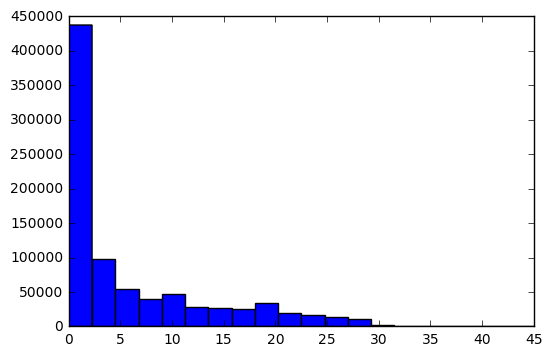

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(np.array( [len(idx) for idx in tag_idx] ), bins =20)